In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


1a. Estimate $R_0$ by examining the period of exponential growth. Be sure to show your work and plots as relevant. In the process, look up the 95\% confidence interval associated with estimating a slope from data points, and use the slope's confidence interval to provide a confidence interval for your $R_0$ estimate.

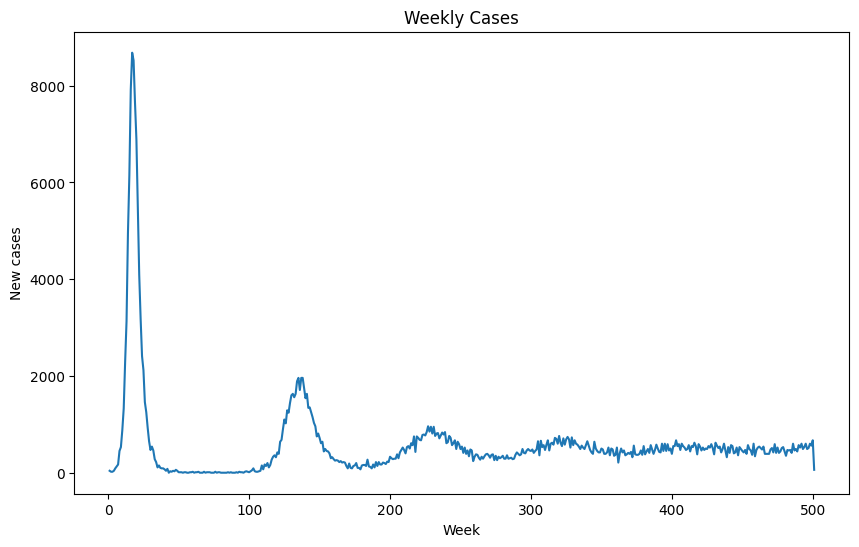

     Week  New Cases  log_cases
0       1         40   3.688879
1       2         20   2.995732
2       3         20   2.995732
3       4         40   3.688879
4       5         90   4.499810
..    ...        ...        ...
496   497        510   6.234411
497   498        600   6.396930
498   499        560   6.327937
499   500        670   6.507278
500   501         60   4.094345

[501 rows x 3 columns]
    Week  New Cases  log_cases
2      3         20   2.995732
3      4         40   3.688879
4      5         90   4.499810
5      6        130   4.867534
6      7        170   5.135798
7      8        450   6.109248
8      9        530   6.272877
9     10        880   6.779922
10    11       1330   7.192934
11    12       2290   7.736307
12    13       3130   8.048788
13    14       4950   8.507143
14    15       6150   8.724207
15    16       7920   8.977146
16    17       8680   9.068777


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


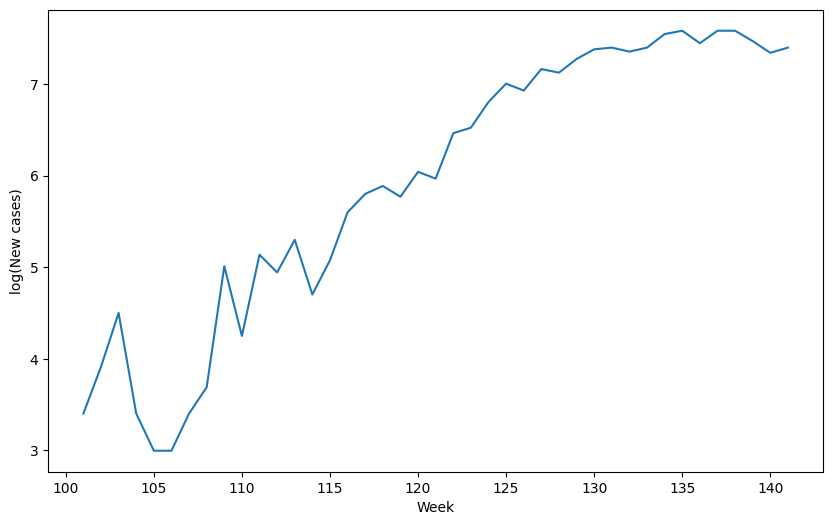

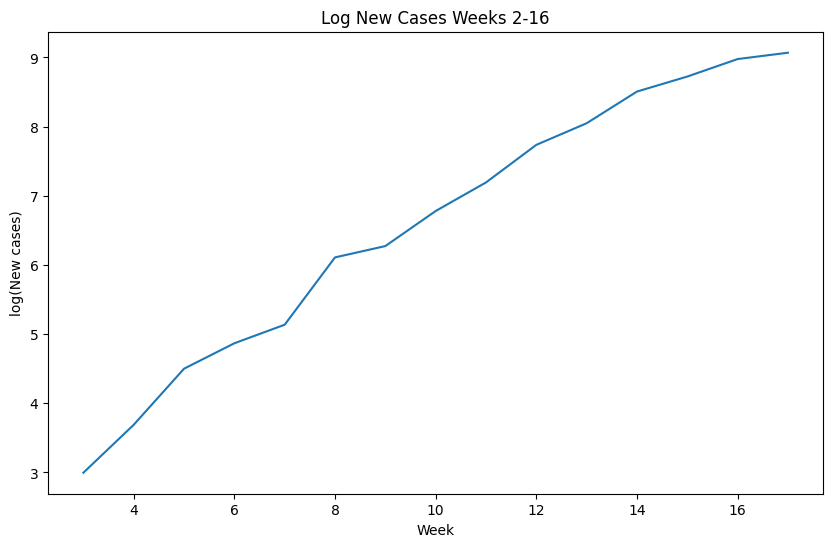

              0        1
const  1.769996  2.60346
Week   0.400439  0.47695
Estimated R0: 1.8601854466200245
95% CI for R0: 1.79 (-0.08), 1.94 (+0.08)


/tmp/ipython-input-432439095.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = model.params[1]


In [3]:
df = pd.read_csv('/content/HW4_all_weeks.csv')

# adjust new cases for 10% asecrtainment
df['New Cases'] = df['New Cases'] * 10

#plot weekly cases
plt.figure(figsize=(10, 6))
plt.plot(df["Week"], df["New Cases"])
plt.xlabel("Week")
plt.ylabel("New cases")
plt.title("Weekly Cases")
plt.savefig('weekly_cases.png')
plt.show()

# find logrithm of incedence
df['log_cases'] = np.log(df['New Cases'])

print(df)

test_df = df.loc[100:140].copy()
exp_growth_df = df.loc[2:16].copy()

print(exp_growth_df)
# plot log incedence

plt.figure(figsize=(10, 6))
plt.plot(test_df["Week"], test_df['log_cases'])
plt.xlabel("Week")
plt.ylabel("log(New cases)")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(exp_growth_df["Week"], exp_growth_df["log_cases"])
plt.xlabel("Week")
plt.ylabel("log(New cases)")
plt.title("Log New Cases Weeks 2-16")
plt.savefig('exp_growth_log_cases.png')
plt.show()

# fit linear regression
model = sm.OLS(exp_growth_df['log_cases'], sm.add_constant(exp_growth_df['Week'])).fit()

# extract slope (r) and 95% confidence intervals
r = model.params[1]
conf_int = model.conf_int(alpha=0.05)
print(conf_int)
#print(conf_int)
r_low, r_high = conf_int.loc['Week']
#print(f"95% CI for r: ({r_low}, {r_high})")

# estimate R0 from growth rate (r)
gamma = 1/2
u = 1/100

R0 = 1 + ( r / (gamma+u) )

print(f"Estimated R0: {R0}")

# apply confidence intervals
R0_low = 1 + ( r_low / (gamma+u) )
R0_high = 1 + ( r_high / (gamma+u) )
print(f"95% CI for R0: {R0_low:.2f} (-{abs(R0 - R0_low):.2f}), {R0_high:.2f} (+{abs(R0 - R0_low):.2f})")


#compute R0 from growth rate


# #plot weekly cases
# plt.figure(figsize=(10, 6))
# plt.plot(df["Week"], df["New Cases"])
# plt.xlabel("Week")
# plt.ylabel("New cases")
# plt.show()

1b. Estimate $R_0$ by utilizing the prevalence or seroprevalence data. Be sure to show your work and plots as relevant. Write down (or look up) the 95\% confidence interval for the prevalence/seroprevalence estimate, and use it to provide a confidence interval for $R_0$.

In [4]:
# Define seroprevelance data and determine confidence intervals assuming normal distribution
seroprevalence = 517/1000
z = 1.96  # critical value for 95% confidence interval of normal distribution

seroprevalence_CI = z * np.sqrt(seroprevalence * (1 - seroprevalence) / 1000)


seroprevalence_low  = seroprevalence - z * np.sqrt(seroprevalence * (1 - seroprevalence) / 1000)
seroprevalence_high = seroprevalence + z * np.sqrt(seroprevalence * (1 - seroprevalence) / 1000)



# estimate R0 and 95% confidence intervals
R0 = 1 / (1 - seroprevalence)
print(f"Estimated R0: {R0:.2f}")

R0_low  = 1 / (1 - seroprevalence_low)
R0_high = 1 / (1 - seroprevalence_high)
print(f"95% CI for R0: {R0_low:.2f} (-{abs(R0 - R0_low):.2f}), {R0_high:.2f} (+{abs(R0 - R0_low):.2f})")


Estimated R0: 2.07
95% CI for R0: 1.95 (-0.12), 2.21 (+0.12)


(Grad / EC) Estimate $R_0$ a third way from the same data. Prevelance = 7/1000.

In [5]:
# estimate R0 from prevelance
prevelance = 7/1000
gamma = 1/2
u = 1/100

# determine 95% CI for prevelance assuming normal distribution
z = 1.96  # critical value for 95% confidence interval of normal distribution
prevelance_low  = prevelance - z * np.sqrt(prevelance * (1 - prevelance) / 1000)
prevelance_high = prevelance + z * np.sqrt(prevelance * (1 - prevelance) / 1000)

# estimate R0
R0      = 1 / (1 - ( prevelance      * ( (gamma/u) + 1 ) ))
R0_low  = 1 / (1 - ( prevelance_low  * ( (gamma/u) + 1 ) ))
R0_high = 1 / (1 - ( prevelance_high * ( (gamma/u) + 1 ) ))

print(f"Estimated R0: {R0:.2f}")
print(f"95% CI for R0: {R0_low:.2f} (-{abs(R0 - R0_low):.2f}), {R0_high:.2f} (+{abs(R0 - R0_low):.2f})")


Estimated R0: 1.56
95% CI for R0: 1.10 (-0.45), 2.64 (+0.45)


1d. Compare your estimates, the uncertainty associated with each, and discuss what might cause
them to be different.

Different values for $R_0$ were estimated from incedence, seroprevelance and prevelance data. The estimated values were 1.86 (+/- 0.08) from the incedence data, 2.07 (+/- 0.12) from the seroprevelance, and 1.56 (+/- 0.45) from the prevelance. It is likely that the values estimated for $R_0$ are different due to differences in the assumptions and collection of the different data used. The confidence interval was smallest for incidence because weekly case counts in the exponential growth phase provide many observations, increasing the precision of the growth rate estimation. The confidence interval was largest for prevalence because only 7 out of 1000 bison were observed to be infected, resulting in a high sampling variance. The highest $R_0$ from seroprevalence likely reflects that cumulative antibody detection does not account for possible seroreversion, while the lowest $R_0$ from prevelance could be due to stochastic effects and the low number of observed infections.



1e. (EC for all) Estimate Rt using Method 5 (Wallinga and Teunis).

In [6]:
# track each infection by week reported
df = pd.read_csv('/content/HW4_all_weeks.csv')

print(df.head())
infection_onsets = []
case_index = 0
for row in df.itertuples():
  for cases in row["New Cases"]:
    infection = (row["Week"], case_index)
    infection_onsets.append(infection)
    case_index += 1

def pij(i, j, infection_onsets):
  """
  Return the probability that case i was infected by case j
  """
  case_i = infection_onsets[i]
  case_j = infection_onsets[j]









   Week  New Cases
0     1          4
1     2          2
2     3          2
3     4          4
4     5          9


TypeError: tuple indices must be integers or slices, not str

2. Suppose we’ve got a diagnostic with sensitivity 0.90 and specificity 0.98

2a-2c:

In [7]:
def true_prevelance(n_pos, n_tests, se, sp):
  """
  Determine true prevelance (theta) from diagnostic test results given sensitivity (se) and specificity (sp)
  Return theta and 95% CI
  """
  #Calculate true prevelance
  phi = n_pos / n_tests
  theta = (phi - (1 - sp)) / (se + sp - 1)

  z = 1.96  # critical value for 95% confidence interval of normal distribution
  CI = z * np.sqrt(theta * (1 - theta) / n_tests)

  print(f"True prevelance from {n_pos} positives from {n_tests} tests: {theta:.2f}")
  print(f"95% CI: {theta - CI:.2f} (-{CI:.2f}), {theta + CI:.2f} (+{CI:.2f})")



se, sp = 0.9, 0.98
true_prevelance(39, 100, se, sp)
true_prevelance(18, 50, se, sp)
true_prevelance(57, 150, se, sp)

True prevelance from 39 positives from 100 tests: 0.42
95% CI: 0.32 (-0.10), 0.52 (+0.10)
True prevelance from 18 positives from 50 tests: 0.39
95% CI: 0.25 (-0.13), 0.52 (+0.13)
True prevelance from 57 positives from 150 tests: 0.41
95% CI: 0.33 (-0.08), 0.49 (+0.08)


2d. Pool Burt’s and Maria’s data to get a third estimate of prevalence, and update your 95% con-
fidence interval. How are your three estimates related? And, how are the widths of the three
confidence intervals related?

The highest estimated prevelance was from Maria's dataset and the lowest from Burt's. This is due to the observed prevelance, based on the number of positive test, was highest for Maria's and lowest for Burt's. The prevelance from the pooled datasets was between Maria's and Burt's being closer to Maria's becasue she had more tests. The widths of the confidence intervals correspond to the total number of test, with Burt's the widest, followed by Maria's then the pooled dataset.

2e. (Grad / EC) You test yourself. Positive! What is your best guess of the probability that you are
actually positive?

Based on the estimated prevelance with the smallest confidence intervals from the pooled dataset, I would calculate PPV = 0.9(0.41) / (0.9(0.41) + (0.02)(0.59)) ~ 0.97

3. The goal of this problem is to learn about how sensitivity and specificity arise from calibration data,
i.e. from positive and negative controls.

3a. Read in the data and produce a tall, skinny plot with three columns of data: the negative controls
(red), the positive controls (black), and the data from the field (blue). Use jitter and transparency
(“alpha”) to allow us to see the distributions of the data.

Number of negative samples: 199
Number of positive samples: 299
         neg        pos     field
0  10.406634  26.373895  5.733980
1  11.117304  26.437459  5.882876
2   7.629801  30.423537  6.348639
3  13.584022  15.762001  6.567216
4   6.635858  16.082338  6.704347


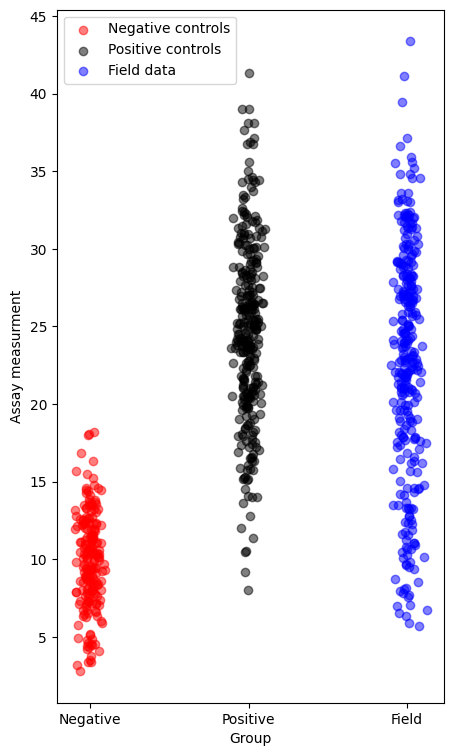

In [10]:
# load dfs
data_df = pd.read_csv('/content/HW4_Q3_data-1.csv')
# print(data_df.head())

neg_df = pd.read_csv('/content/HW4_Q3_neg-1.csv')
# print(neg_df.head())
print(f"Number of negative samples: {len(neg_df)}")
print(f"Number of positive samples: {len(data_df)}")

pos_df = pd.read_csv('/content/HW4_Q3_pos-1.csv')
# print(pos_df.head())

# merge dfs
combined_df = pd.concat([neg_df, pos_df, data_df], axis=1)
combined_df.columns = ['neg', 'pos', 'field']
print(combined_df.head())

# make plot

# add jitter
x_neg = np.random.normal(0, 0.04, size=len(combined_df['neg']))  # around x=0
x_pos = np.random.normal(1, 0.04, size=len(combined_df['pos']))  # around x=1
x_field = np.random.normal(2, 0.04, size=len(combined_df['field']))  # around x=2


plt.figure(figsize=(5, 9))
plt.scatter(x_neg, combined_df['neg'], color='red', alpha=0.5, label='Negative controls')
plt.scatter(x_pos, combined_df['pos'], color='black', alpha=0.5, label='Positive controls')
plt.scatter(x_field, combined_df['field'], color='blue', alpha=0.5, label='Field data')

plt.xticks([0, 1, 2], ['Negative', 'Positive', 'Field'])
plt.xlabel('Group')
plt.ylabel('Assay measurment')
plt.legend()
plt.savefig('calibration_data.png')
plt.show()



3b. Consider a cutoff $c$ such that any assay values above $c$ are to be called positive and any assay values below $c$ are to be called negative. Then write four functions: $se(c)$, $sp(c)$, and $\hat{\phi}(c)$ and $\hat{\theta}(c)$. They should correspond to the sensitivity, the specificity, the raw prevalence in the field data, and the corrected prevalence in the field data. What value of $c$ corresponds to the ``Youden'' choice?

In [11]:
def se(c, df):
  """
  Determine sensitivity (se) from cutoff c based on pos samples in df
  """
  pos = df['pos'].dropna()

  # determine true positives
  tp = pos.loc[pos >= c]

  # calculate sensetivity
  se = len(tp) / len(pos)
  return se

def sp(c, df):
  """
  Determine specificity (sp) from cutoff c based on neg samples in df
  """
  neg = df['neg'].dropna()

  # determine true negatives
  tn = neg.loc[neg < c]

  #calculate specificity
  sp = len(tn) / len(neg)
  return sp


def raw_prevelance(c, df):
  """
  Determine raw prevelance (phi) from cutoff c based on field data
  """
  field = df['field'].dropna()

  # determine true positives
  tp = field.loc[field >= c]

  # calculate raw prevelance
  phi = len(tp) / len(field)
  return phi

def corrected_prevelance(c, df):
  """
  Determine corrected prevelance (theta) from cutoff c based on field data,
  se and sp calculations, and raw prevelance (phi)
  """
  sens = se(c, df)
  spes = sp(c, df)
  phi = raw_prevelance(c, df)
  theta = (phi - (1 - spes)) / (sens + spes - 1)

  return theta

def test_cutoff(c, df, v=False):
  """
  Determine the sensitivity, specificity, raw prevelance, and corrected prevelance
  for a given cutoff c.
  Calculate Youden index as well.
  """
  sens = se(c, df)
  spes = sp(c, df)
  phi = raw_prevelance(c, df)
  theta = corrected_prevelance(c, df)



  # calculate Youden index
  youden = sens + spes - 1

  if v:
    print(f"Cutoff:\t\t\t{c}")
    print(f"Sensitivity:\t\t{sens:.2f}")
    print(f"Specificity:\t\t{spes:.2f}")
    print(f"Raw prevelance:\t\t{phi:.2f}")
    print(f"Corrected prevelance:\t{theta:.2f}")
    print(f"Youden index:\t\t{youden:.2f}\n")


  return [sens, spes, phi, theta, youden]



C = np.arange(10, 20.10, 0.1)
results = np.empty((len(C), 5))

for i, c in enumerate(C):
  results[i] = test_cutoff(c, combined_df)

# report c with best Youden index
best = np.argmax(results[:, 4])
print(f"Cutoff with best Youden index: {C[best]:.2f}")

Cutoff with best Youden index: 14.80


3c. (Grad / EC) By sweeping over various choices of $c$, plot a receiver operator curve, and place a point at the Youden choice. Create a second plot showing how $\hat{\theta}(c)$ varies, and again, place a point at the Youden choice.

<>:27: SyntaxWarning: invalid escape sequence '\h'
<>:30: SyntaxWarning: invalid escape sequence '\h'
<>:27: SyntaxWarning: invalid escape sequence '\h'
<>:30: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-1202350135.py:27: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(C, theta, label='Corrected prevalence $\hat{θ}(c)$')
/tmp/ipython-input-1202350135.py:30: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Corrected Prevelance $\hat{θ}$')


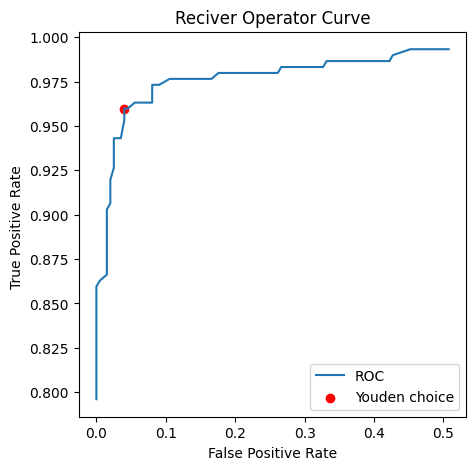

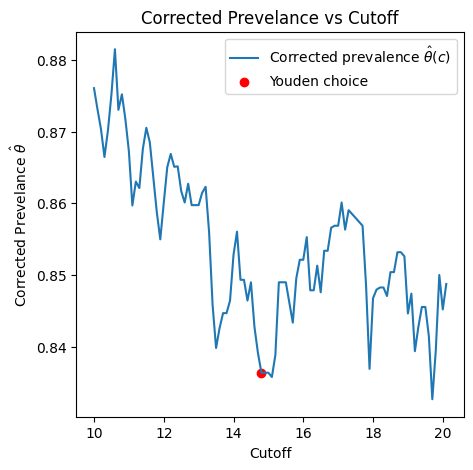

In [13]:
C = np.arange(10, 20.10, 0.1)
results = np.empty((len(C), 5))

for i, c in enumerate(C):
  results[i] = test_cutoff(c, combined_df)

# report c with best Youden index
best = np.argmax(results[:, 4])

sens = results[:, 0]
spes = results[:, 1]
theta = results[:, 3]

# plot receiver operator curve, ROC = (1 - specificity) vs sensitivity
plt.figure(figsize=(5, 5))
plt.plot(1 - spes, sens, label='ROC')
plt.scatter(1 - spes[best], sens[best], color='red', label='Youden choice')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Reciver Operator Curve')
plt.legend()
plt.savefig('roc.png')
plt.show()

# plot corrected prevelance vs cuttoff
plt.figure(figsize=(5, 5))
plt.plot(C, theta, label='Corrected prevalence $\hat{θ}(c)$')
plt.scatter(C[best], theta[best], color='red', label='Youden choice')
plt.xlabel('Cutoff')
plt.ylabel('Corrected Prevelance $\hat{θ}$')
plt.title('Corrected Prevelance vs Cutoff')
plt.legend()
plt.savefig('theta_vs_cutoff.png')

plt.show()


3d. Write 3-4 sentences reflecting on how the conclusions of a study might be affected by how one
decides to choose the cutoff at which positives and negatives are called.

The way a cutoff value for calling positives and negatives is chosen will have a significant effect on a study's conclusions. With overlapping calbration data, chosing a cuttoff value to maximize true positive calls will result in increased sensetivity at the cost of decreased specificity. Chosing a cuttoff value that maximizes true negative calls will result in increased specificity and decreased sensitivity. Additionally, how a cutoff is chosen will have an impact on the corrected prevelance estimation. Choosing a cutoff that maximizes the Youden index balances sensitivity and specificity, but different criteria could lead to a different “optimal” cutoff depending on the specific impacts of false positive and false negative calls. Overall, because the estimated prevalence and the interpretation of the diagnostic’s performance depend on how the cutoff is chosen, it is important to clearly justify and report how the cutoff is selected.
